In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import urllib
import requests
import json
import chess.pgn
from glob import glob

In [68]:
username = "bm_bhattarai"
pgn_archive_links = requests.get(f'https://api.chess.com/pub/player/{username}/games/archives')
print(username)

bm_bhattarai


In [69]:
for url in json.loads(pgn_archive_links.text)['archives']:
    filepath = './bm_bhattarai/'+username + url.split("/")[7] + url.split("/")[8]
    urllib.request.urlretrieve(url + "/pgn",filepath)

In [6]:
pgn_files = glob("../Chess com/bm_bhattarai/*")

In [7]:
headers = []
games = []
for pgn in pgn_files:
    pgn = open(pgn)

    while True:
        
        game = chess.pgn.read_game(pgn)

        if game is None:
            break
        headers.append(game.headers) 
        games.append(game.mainline_moves())

        

In [8]:
df = pd.DataFrame(headers)

In [9]:
df['moves'] = games 

In [40]:
df.head(2)

,Black,BlackElo,CurrentPosition,Date,ECO,ECOUrl,EndDate,EndTime,Event,FEN,...,StartTime,Termination,TimeControl,Timezone,Tournament,UTCDate,UTCTime,White,WhiteElo,moves
0,BM_Bhattarai,445,2r5/2P5/8/pP1k4/P1R5/3K4/2P3P1/8 b - -,2022.05.04,D02,https://www.chess.com/openings/Queens-Pawn-Ope...,2022.05.04,16:27:39,Live Chess,NaN,...,15:59:56,Game drawn by agreement,900+10,UTC,NaN,2022.05.04,15:59:56,suraj410,1424,1. d4 { [%clk 0:15:10] } 1... d5 { [%clk 0:15:...
1,Andrea850,394,rnbqkbnr/ppppppp1/8/7p/4P3/5N2/PPPP1PPP/RNBQKB...,2021.09.02,B00,https://www.chess.com/openings/Kings-Pawn-Open...,2021.09.02,10:19:16,Live Chess,NaN,...,10:18:57,BM_Bhattarai won by resignation,600,UTC,NaN,2021.09.02,10:18:57,BM_Bhattarai,495,1. e4 { [%clk 0:09:58] } 1... h5 { [%clk 0:09:...


In [10]:
df.shape

(466, 25)

### Analysis of my games in Black

In [11]:
blacks = df[df['Black']=='BM_Bhattarai']
blacks_won = blacks[blacks['Result']=='0-1']

In [12]:
print('Number of black game : ',blacks.shape[0])
print('Number of black game won : ',blacks_won.shape[0])
print('Win Percentage in Black :',(blacks_won.shape[0]/blacks.shape[0])*100)


Number of black game :  227
Number of black game won :  103
Win Percentage in Black : 45.37444933920705


In [13]:
whites = df[df['White']=='BM_Bhattarai']
whites_won = whites[whites['Result']=='1-0']

#### Similar in Whites

In [14]:
print('Number of white game : ',whites.shape[0])
print('Number of white game won : ',whites_won.shape[0])
print('Win Percentage in White :',(whites_won.shape[0]/whites.shape[0])*100)

Number of white game :  239
Number of white game won :  97
Win Percentage in White : 40.58577405857741


In [15]:
df.columns

Index(['Black', 'BlackElo', 'CurrentPosition', 'Date', 'ECO', 'ECOUrl',
       'EndDate', 'EndTime', 'Event', 'FEN', 'Link', 'Result', 'Round',
       'SetUp', 'Site', 'StartTime', 'Termination', 'TimeControl', 'Timezone',
       'Tournament', 'UTCDate', 'UTCTime', 'White', 'WhiteElo', 'moves'],
      dtype='object')

In [16]:
df.head()

,Black,BlackElo,CurrentPosition,Date,ECO,ECOUrl,EndDate,EndTime,Event,FEN,...,StartTime,Termination,TimeControl,Timezone,Tournament,UTCDate,UTCTime,White,WhiteElo,moves
0,BM_Bhattarai,445,2r5/2P5/8/pP1k4/P1R5/3K4/2P3P1/8 b - -,2022.05.04,D02,https://www.chess.com/openings/Queens-Pawn-Ope...,2022.05.04,16:27:39,Live Chess,NaN,...,15:59:56,Game drawn by agreement,900+10,UTC,NaN,2022.05.04,15:59:56,suraj410,1424,1. d4 { [%clk 0:15:10] } 1... d5 { [%clk 0:15:...
1,Andrea850,394,rnbqkbnr/ppppppp1/8/7p/4P3/5N2/PPPP1PPP/RNBQKB...,2021.09.02,B00,https://www.chess.com/openings/Kings-Pawn-Open...,2021.09.02,10:19:16,Live Chess,NaN,...,10:18:57,BM_Bhattarai won by resignation,600,UTC,NaN,2021.09.02,10:18:57,BM_Bhattarai,495,1. e4 { [%clk 0:09:58] } 1... h5 { [%clk 0:09:...
2,BM_Bhattarai,486,1k1R1b1r/p5p1/1p2N3/n1p1P2p/6n1/B5P1/P4PBP/1R4...,2021.09.02,B29,https://www.chess.com/openings/Sicilian-Defens...,2021.09.02,10:18:46,Live Chess,NaN,...,10:02:44,OrlinDraganov667 won by checkmate,600,UTC,NaN,2021.09.02,10:02:44,OrlinDraganov667,548,1. e4 { [%clk 0:10:00] } 1... c5 { [%clk 0:09:...
3,BM_Bhattarai,205,6Q1/p7/1p6/5pNk/bP5P/2P5/P4P2/RN2R1K1 w - -,2021.09.02,B01,https://www.chess.com/openings/Scandinavian-De...,2021.09.02,06:59:52,Live Chess,NaN,...,06:54:39,BM_Bhattarai won on time,180,UTC,NaN,2021.09.02,06:54:39,singinguncle,237,1. e4 { [%clk 0:02:59.7] } 1... d5 { [%clk 0:0...
4,s4mi1,245,8/8/3k1R2/8/4K3/8/8/8 b - -,2021.09.02,A00,https://www.chess.com/openings/Barnes-Opening-...,2021.09.02,06:54:01,Live Chess,NaN,...,06:47:43,BM_Bhattarai won on time,180,UTC,NaN,2021.09.02,06:47:43,BM_Bhattarai,193,1. e4 { [%clk 0:02:59.2] } 1... d5 { [%clk 0:0...


#### Total Number of Games Drawn

In [17]:
draws = df[df['Result']=='1/2-1/2']

In [18]:
draws.shape[0]

33

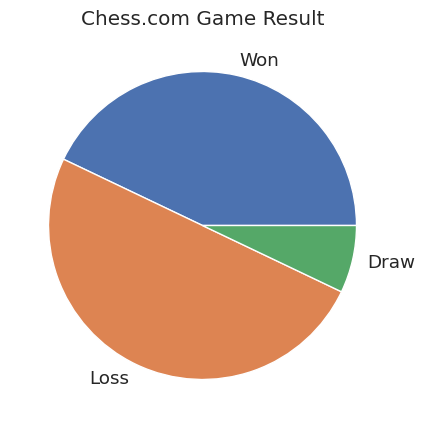

In [19]:
sns.set_theme(font_scale=1.2,style="darkgrid")
plt.figure(figsize=(10,5))
plt.pie(x=[
    whites_won.shape[0]+blacks_won.shape[0],
    df.shape[0]-(whites_won.shape[0]+blacks_won.shape[0])-draws.shape[0],
    draws.shape[0]
    ],
    labels=['Won','Loss','Draw'])
plt.title('Chess.com Game Result')
plt.show()

#### Add a new Column name Outcome(i.e Result) in favour of Us

In [20]:
outcome = []
for i in range(len(df)):
    if df.iloc[i]['Black']=='BM_Bhattarai' and df.iloc[i]['Result']=='0-1' or df.iloc[i]['White']=='BM_Bhattarai' and df.iloc[i]['Result']=='1-0':
        outcome.append('Win')
    elif df.iloc[i]['Result']=='1/2-1/2':
        outcome.append('Draw')
    else:
        outcome.append('Loss')

#### Add a new Column name Color (Black/White)

In [21]:
color = []
for i in range(len(df)):
    if df.iloc[i]['Black'] == 'BM_Bhattarai':
        color.append('Black')
    else:
        color.append('White')

#### Similarly, Add a new Column name Format of Game

In [45]:
df['TimeControl'].value_counts()

600         144
300         123
60           83
180          71
900+10       23
60+1         13
1200          4
300+5         2
1/86400       1
1/604800      1
180+2         1
Name: TimeControl, dtype: int64

In [55]:
format = []
for i in range(len(df)):
    if df.iloc[i]['TimeControl'] == '60' or df.iloc[i]['TimeControl'] == '60+1':
        format.append('Bullet')
    elif '180' in df.iloc[i]['TimeControl'] or '300' in df.iloc[i]['TimeControl']:
        format.append('Biltz')
    elif df.iloc[i]['TimeControl'] == '600':
        format.append('Rapid')
    else:
        format.append('Classical')

In [56]:
df['Format'] = format
df['Color']=color
df['Outcome']=outcome

In [100]:
df.columns

Index(['Black', 'BlackElo', 'CurrentPosition', 'Date', 'ECO', 'ECOUrl',
       'EndDate', 'EndTime', 'Event', 'FEN', 'Link', 'Result', 'Round',
       'SetUp', 'Site', 'StartTime', 'Termination', 'TimeControl', 'Timezone',
       'Tournament', 'UTCDate', 'UTCTime', 'White', 'WhiteElo', 'moves',
       'Color', 'Outcome'],
      dtype='object')

In [23]:
pd.crosstab(df['Color'],df['Outcome'])

Outcome,Draw,Loss,Win
Color,,,
Black,14,110,103
White,19,123,97


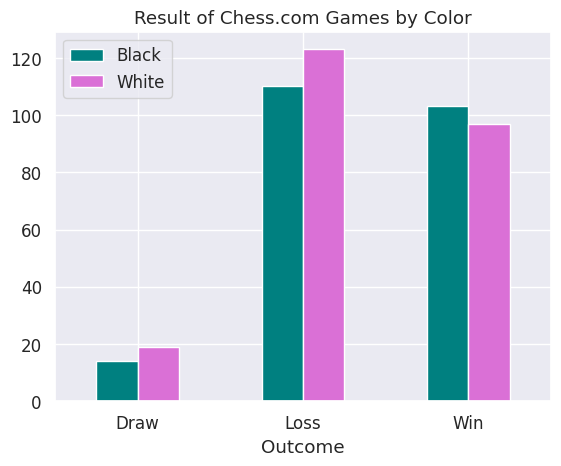

In [44]:
sns.set_theme(font_scale=1.1,style='darkgrid')
pd.crosstab(df['Outcome'],df['Color']).plot(kind='bar',title='Result of Chess.com Games by Color',rot=0,color=['teal','orchid']).legend(loc='upper left',fontsize=12)

In [57]:
pd.crosstab(df['Format'],df['Outcome'])

Outcome,Draw,Loss,Win
Format,,,
Biltz,12,104,81
Bullet,2,47,47
Classical,2,17,10
Rapid,17,65,62


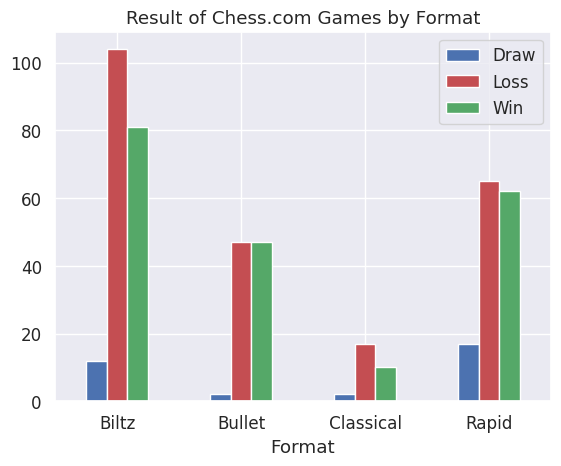

In [62]:
pd.crosstab(df['Format'],df['Outcome']).plot(kind='bar',title='Result of Chess.com Games by Format',rot=0,color=['b','r','g']).legend(loc='upper right',fontsize=12)

In [67]:
df.iloc[1].moves

<Mainline at 0x7f5da4150be0 (1. e4 h5 2. Nf3)>